In [39]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import sklearn

In [40]:
df = pd.read_csv(r"C:\Users\minhcq\Downloads\store.csv")

In [41]:
df.head()

,reps,product,qty,revenue,region
0,Chitra,Galaxy,2,155.10,West
1,Vijay,Jet,2,39.30,North
2,Mala,Beacon,3,74.25,West
3,Suman,Alpen,3,100.98,North
4,Rachna,Orbit,2,44.98,North


In [42]:
df.describe()

,qty,revenue
count,10000.000000,10000.000000
mean,3.387400,90.570221
std,4.318308,127.803928
min,1.000000,18.430000
25%,2.000000,39.300000
50%,2.000000,58.425000
75%,3.000000,75.000000
max,25.000000,1998.750000


In [43]:
df['price']=df['revenue']/df['qty']

Theo region

In [44]:
df.groupby('region').sum()

,qty,revenue,price
region,,,
East,5614,146141.53,45258.518389
North,12174,326109.54,96731.180505
South,5908,158819.85,44282.825799
West,10178,274631.29,80851.455182


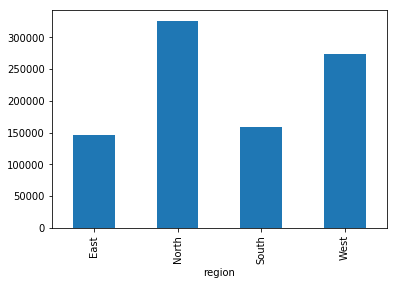

In [45]:
df.groupby('region').sum()['revenue'].plot.bar()

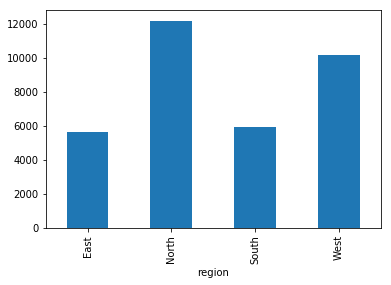

In [46]:
df.groupby('region').sum()['qty'].plot.bar()

In [47]:
X = df.pivot_table(index=['region','product'],values=['qty','revenue'],aggfunc='sum')
Y = df.pivot_table(index=['region','product'],values=['qty','price'],aggfunc='mean')

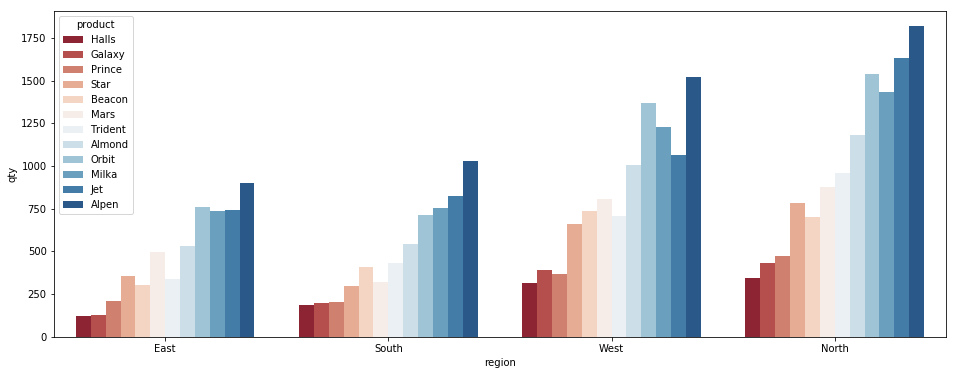

In [48]:
plt.figure(figsize=(16, 6))
sbn.barplot(data=X.reset_index().sort_values('qty'),x='region',y='qty',hue='product',palette='RdBu')


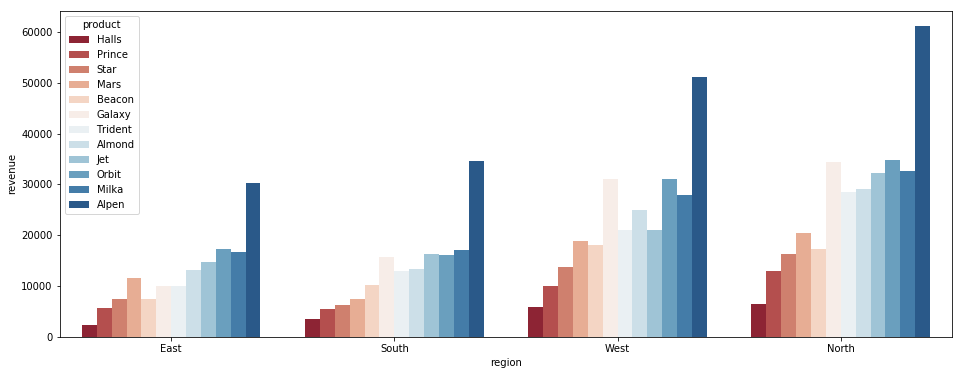

In [49]:
plt.figure(figsize=(16, 6))
sbn.barplot(data=X.reset_index().sort_values('revenue'),x='region',y='revenue',hue='product',palette='RdBu')

Theo san pham

In [50]:
df.pivot_table(index='region',columns='product',values=['qty','revenue'],aggfunc='sum')

qty                                                          ...  \
product Almond Alpen Beacon Galaxy Halls   Jet Mars Milka Orbit Prince  ...   
region                                                                  ...   
East       529   903    303    125   123   742  494   737   759    208  ...   
North     1181  1818    703    434   346  1630  874  1434  1536    474  ...   
South      541  1027    411    198   185   824  322   752   713    203  ...   
West      1007  1519    735    393   315  1066  808  1230  1367    368  ...   

          revenue                                                             \
product    Beacon    Galaxy    Halls       Jet      Mars     Milka     Orbit   
region                                                                         
East      7492.95   9906.96  2310.05  14643.30  11485.13  16702.79  17232.23   
North    17321.42  34346.80  6507.36  32173.26  20351.72  32580.58  34820.15   
South    10178.19  15667.34  3474.92  16254.69   7485.44  17068.95  16175.54   
West     18171.85  30998.08  5918.85  21006.31  18787.31  27897.08  31056.33   

                                       
product    Prince      Star   Trident  
region                                 
East      5636.46   7366.55   9957.90  
North    12887.19  16305.08  28460.55  
South     5516.84   6190.96  12918.30  
West      9984.97  13775.40  20952.45  

[4 rows x 24 columns]

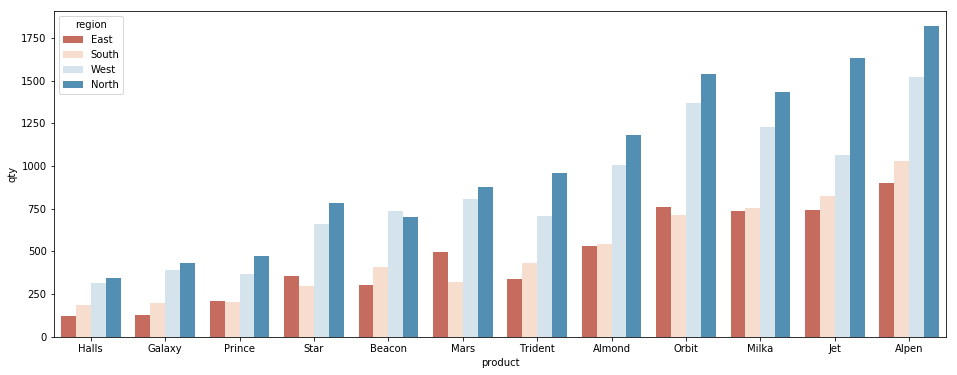

In [51]:
plt.figure(figsize=(16, 6))
sbn.barplot(data=X.reset_index().sort_values('qty'),x='product',y='qty',hue='region',palette='RdBu')


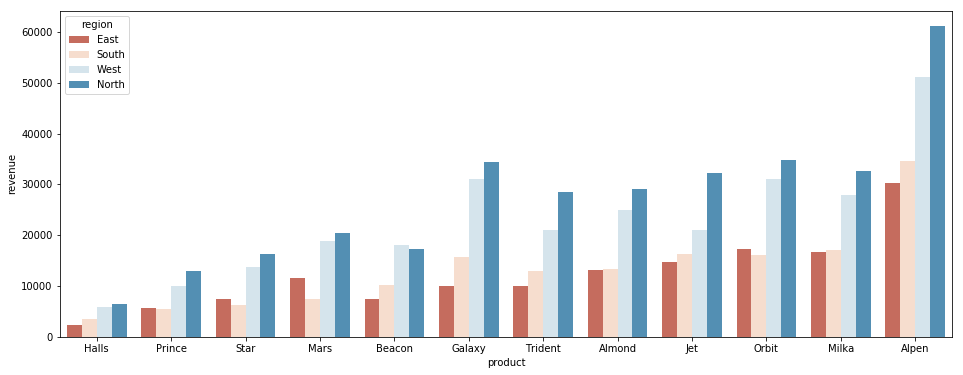

In [52]:
plt.figure(figsize=(16, 6))
sbn.barplot(data=X.reset_index().sort_values('revenue'),x='product',y='revenue',hue='region',palette='RdBu')

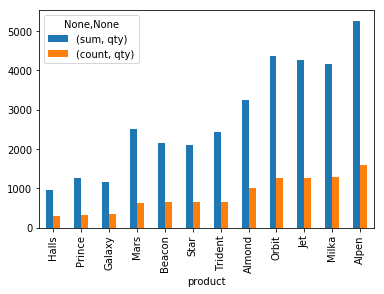

In [53]:
df.pivot_table(index='product',values='qty',aggfunc=['sum','count']).sort_values(('count','qty')).plot.bar()

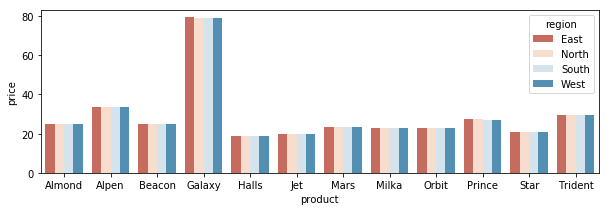

In [54]:
plt.figure(figsize=(10, 3))
sbn.barplot(data=Y.reset_index(),x='product',y='price',hue='region',palette='RdBu')

Theo sale

In [55]:
rep_df = df.pivot_table(index=['region','reps'],columns='product',values=['qty','revenue'],aggfunc='sum')

In [56]:
rep_revenue = rep_df['revenue']

In [57]:
rep_revenue.fillna(0)

product          Almond    Alpen   Beacon   Galaxy    Halls      Jet     Mars  \
region reps                                                                     
East   Aash     2535.02  6217.75  1190.76  2378.10   319.11  2861.58  4012.66   
       Anusha    519.63  1444.32   148.13   397.35     0.00   955.40   817.10   
       Durga     732.75  1838.38   344.51   707.55   205.68   957.68   371.31   
       Hussain  1643.51  3498.43  1114.75   553.25   486.03  2001.26  1325.06   
       Javed     644.25  1708.67   346.63   555.65    19.00   415.25  1083.24   
       Keshab    322.01  2086.92   886.01   318.20    57.00   865.91   117.03   
       Kishen    398.38  1742.33   348.25   872.25   454.29   784.42   702.42   
       Kumar    1076.52  1385.50   321.76   712.35   111.72  1852.35   577.99   
       Madhu     691.88  2223.60   368.38   472.10   206.06   590.10   704.53   
       Ram       888.88   505.07   472.01   319.80    92.82   357.30   371.30   
       Satya    1040.88  1000.11   547.25   799.50   150.29  1183.63   630.52   
       Vish     2597.91  6664.51  1404.51  1820.86   208.05  1818.42   771.97   
North  Ananya   1781.50  4138.99  1303.39  1103.70   283.58  1277.37   880.80   
       Aparna    467.01   904.74   147.00  1433.10    76.00  1270.01   806.06   
       Chand     907.39  1176.74   123.75   953.00    55.48   675.00   794.07   
       Kamat     468.76  1421.54   347.25   713.55   131.39   611.26   298.92   
       Kishore  1011.26  2130.10   247.75  4502.77    75.43   872.81    70.50   
       Mukund    569.76  1989.85   439.77   627.60   436.43  1221.44   749.18   
       Nandini  3073.27  6424.81   956.76  2303.35   224.77  2971.92   789.51   
       Pooja     596.75  1761.20   323.38   316.60    95.00  1005.27   514.53   
       Prarth    273.00  1386.01   319.89   876.25   185.25   316.20   535.93   
       Prasad   1061.63   978.35   296.50   637.20   131.86  1282.17   441.69   
       Rachna   1431.64  4625.02  1920.51  1516.65   680.69  2793.16  1529.65   
       Rajat    1119.51  1418.48   269.38   557.25   186.77  1514.90   231.95   
       Ranga     616.14  1582.02   490.50  3089.26   715.26  1143.92   998.78   
       Ratna     673.13  1341.98   124.50   795.90   113.62   752.81   491.03   
       Ravi     2702.92  4661.40  1687.77  1339.15   617.12  2881.24  2803.91   
       Rishi     795.50  1906.21   197.25   398.15     0.00  1149.61   256.98   
       Rohini    517.13   845.58   174.50   396.15   336.68   569.15   564.00   
       Sai      2099.14  4430.20  1898.27  1272.80   546.63  2075.76  2256.49   
...                 ...      ...      ...      ...      ...      ...      ...   
South  Rahul     542.63  1836.85   522.88  1258.80   341.62  1106.91   395.74   
       Raji      672.63  1842.97   273.75   155.90    74.67  1447.95   210.57   
       Satyen   1220.63  2290.58  1500.01   631.20    75.43   316.60   673.76   
       Seet     3124.16  5978.56  1393.01  3614.13  1028.28  3959.24  1651.73   
       Sruti     960.89  2390.37   146.26  2469.65    95.00   628.22   234.77   
       Swami    1348.88  2846.31   271.88   788.70   617.60  1334.05   186.13   
       Vaghya   1620.51  4478.14  1960.51  1587.80   132.43  1704.40  1690.83   
West   Akila     719.63   974.78   571.50   315.80   151.43  1025.91  1755.34   
       Anahit    250.00  1399.27   469.75  1095.30   112.10   530.05   372.25   
       Bala     1243.25  1883.60   420.13  1594.20    94.62  1063.43   718.52   
       Chandra  1468.52   736.27   839.38  1955.97    74.11   526.08   350.15   
       Chitra    616.64  1514.02  1504.13   857.45     0.00   829.61   844.83   
       Easwar   1236.63  3736.26   444.25   629.60   467.70  1811.44   809.47   
       Jagdish  2832.89  5161.88  1913.01  2133.06   468.92  2162.15   863.41   
       Jaggi     444.38  1482.23   296.88   710.35     0.00   295.25   654.25   
       John      815.89  2290.75   422.38  2623.95   131.29   528.37   319.14   
       Mak       755.63  2425.7

In [58]:
rep_revenue['Total']=rep_revenue.sum(axis=1)

C:\Users\minhcq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
top_rep = rep_revenue.sort_values('Total',ascending=False).head(20)

In [60]:
top_rep

product          Almond    Alpen   Beacon   Galaxy    Halls      Jet     Mars  \
region reps                                                                     
South  Seet     3124.16  5978.56  1393.01  3614.13  1028.28  3959.24  1651.73   
East   Aash     2535.02  6217.75  1190.76  2378.10   319.11  2861.58  4012.66   
West   Santosh  2257.53  4336.36  2517.26  5200.73   414.58  1710.48  2368.59   
North  Rachna   1431.64  4625.02  1920.51  1516.65   680.69  2793.16  1529.65   
       Shaanth  3832.39  4282.13  1902.13  2133.46   264.86  2085.66  1653.47   
       Ravi     2702.92  4661.40  1687.77  1339.15   617.12  2881.24  2803.91   
       Nandini  3073.27  6424.81   956.76  2303.35   224.77  2971.92   789.51   
East   Vish     2597.91  6664.51  1404.51  1820.86   208.05  1818.42   771.97   
North  Sai      2099.14  4430.20  1898.27  1272.80   546.63  2075.76  2256.49   
West   Jagdish  2832.89  5161.88  1913.01  2133.06   468.92  2162.15   863.41   
South  Vaghya   1620.51  4478.14  1960.51  1587.80   132.43  1704.40  1690.83   
West   Mala     1179.51  2419.27  1040.51  3407.46   359.86   867.10  1835.37   
North  Ananya   1781.50  4138.99  1303.39  1103.70   283.58  1277.37   880.80   
West   Suresh   2060.26  4204.10   667.25   399.75   545.69  1358.77  1343.41   
North  Suman    1473.25  4338.57  1512.77  2840.22   189.15  1620.61   418.31   
East   Hussain  1643.51  3498.43  1114.75   553.25   486.03  2001.26  1325.06   
South  Bharath  1165.01  4001.97  1142.38   953.40   359.86  1322.76   395.98   
West   Easwar   1236.63  3736.26   444.25   629.60   467.70  1811.44   809.47   
       Mehta    1418.64  3520.19   148.88  1668.95    37.05   532.85   631.93   
North  Susan     599.25  3995.34  1055.00  1414.71   766.85   806.67   930.84   

product           Milka    Orbit   Prince     Star  Trident     Total  
region reps                                                            
South  Seet     3998.54  4509.10  1591.17  1283.74  3615.75  35747.41  
East   Aash     2876.64  2323.66  2221.74  1288.15  1773.30  29998.47  
West   Santosh  3579.04  3238.21  1294.17  1107.86  1776.90  29801.71  
North  Rachna   5245.66  3934.30  1606.02   913.00  2067.45  28263.75  
       Shaanth  3786.16  3278.71   955.63  1042.44  2475.45  27692.49  
       Ravi     3252.12  3096.50  1060.42  1145.14  2201.10  27448.79  
       Nandini  2311.40  2958.58   764.51  1302.64  2488.05  26569.57  
East   Vish     2243.71  3629.98   652.04  1391.05  1631.70  24834.71  
North  Sai      2328.96  2342.03  1119.67  2243.44  1799.40  24412.79  
West   Jagdish  2554.89  2077.75   351.46   789.71  2325.00  23634.13  
South  Vaghya   1954.74   836.86  1563.24  1412.16   832.05  19773.67  
West   Mala     1808.68  2424.31  1428.08  1239.75   590.70  18600.60  
North  Ananya   1403.60  2335.49   243.66  1530.60  2228.25  18510.93  
West   Suresh   2380.14  1731.10   245.44  1641.78  1245.75  17823.44  
North  Suman    1116.86  1085.99   878.76   905.63   894.00  17274.12  
East   Hussain  2880.54  1587.32   110.00  1035.00   771.60  17006.75  
South  Bharath  1963.50  1887.39   410.58   417.59  1458.30  15478.72  
West   Easwar   1756.47  1385.37   216.71   331.49  1124.40  13949.79  
       Mehta     909.05  2154.65   506.83   825.74   971.10  13325.86  
North  Susan     819.09  1519.98   245.30   208.11   941.70  13302.84

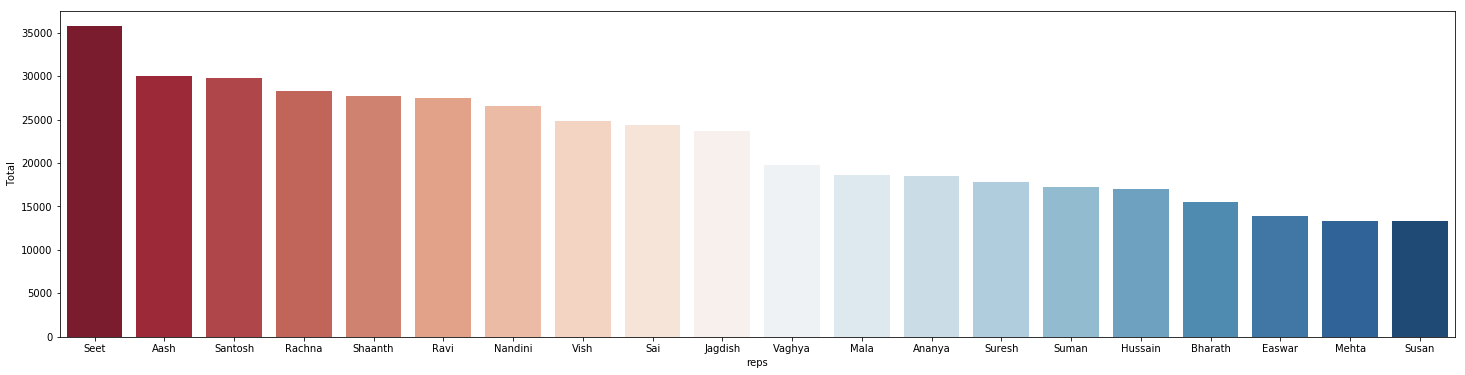

In [61]:
plt.figure(figsize=(25, 6))
sbn.barplot(data=top_rep.reset_index(),x='reps',y='Total',palette='RdBu')

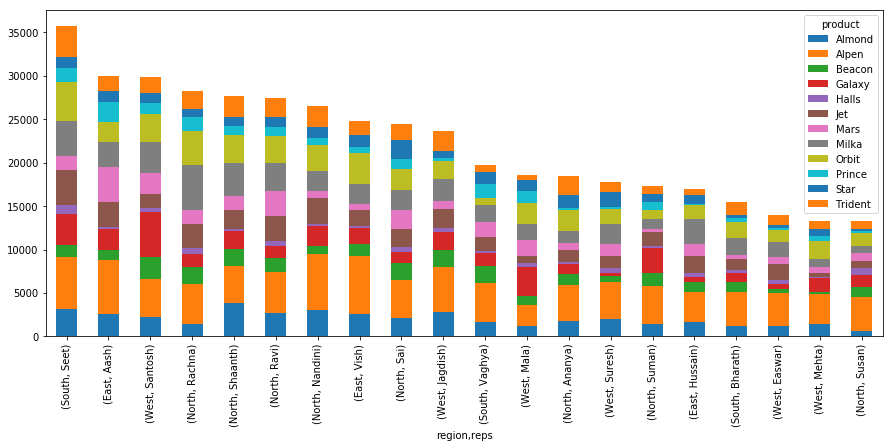

In [62]:
top_rep.drop('Total',axis=True).plot.bar(stacked=True,figsize=(15, 6))

In [63]:
from sklearn import preprocessing

In [64]:
LabelEncoder = preprocessing.LabelEncoder()

In [65]:
df['region'] = LabelEncoder.fit_transform(df['region'])

In [66]:
df['reps'] = LabelEncoder.fit_transform(df['reps'])

In [67]:
df['product'] = LabelEncoder.fit_transform(df['product'])

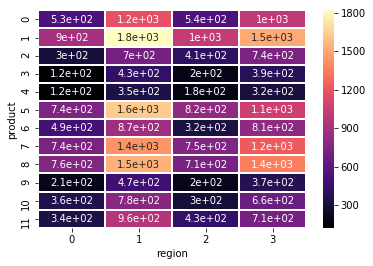

In [68]:
sbn.heatmap(df.pivot_table(values='qty',index='product',columns='region',aggfunc='sum'),cmap='magma',linecolor='white',linewidths=1,annot=True)

In [69]:
df.pivot_table(values='qty',index='product',columns='region')

region,0,1,2,3
product,,,,
0,2.890710,3.132626,3.339506,3.436860
1,3.369403,3.145329,3.789668,3.225053
2,2.681416,3.239631,4.069307,3.340909
3,2.272727,3.338462,3.666667,3.815534
4,2.795455,3.233645,3.490566,3.058252
5,3.419355,3.438819,3.711712,2.952909
6,4.371681,3.672269,3.617978,4.080808
7,3.190476,3.342657,3.044534,3.178295
8,3.932642,3.353712,3.461165,3.434673


In [70]:
from sklearn.model_selection import train_test_split

In [83]:
df.head()

,reps,product,qty,revenue,region,price
0,12,3,2,155.10,3,77.55
1,70,5,2,39.30,1,19.65
2,28,2,3,74.25,3,24.75
3,60,1,3,100.98,1,33.66
4,41,8,2,44.98,1,22.49


In [88]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['region'],
                                                    test_size=0.30)

In [85]:
df.drop(['reps'],axis=1,inplace=True)

In [86]:
df.drop(['qty'],axis=1)

,product,revenue,region,price
0,3,155.10,3,77.550000
1,5,39.30,1,19.650000
2,2,74.25,3,24.750000
3,1,100.98,1,33.660000
4,8,44.98,1,22.490000
5,11,29.25,0,29.250000
6,6,68.39,1,22.796667
7,8,45.44,3,22.720000
8,7,22.38,1,22.380000
9,0,49.25,3,24.625000


In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('region',axis=1))
scaled_features = scaler.transform(df.drop('region',axis=1))

C:\Users\minhcq\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\minhcq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [90]:
pred = knn.predict(X_test)

In [91]:
from sklearn.metrics import classification_report,confusion_matrix

In [92]:
print(confusion_matrix(y_test,pred))

[[152 144  84 140]
 [263 331 186 297]
 [138 157  83 117]
 [216 269 161 262]]


In [93]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.20      0.29      0.24       520
           1       0.37      0.31      0.33      1077
           2       0.16      0.17      0.16       495
           3       0.32      0.29      0.30       908

   micro avg       0.28      0.28      0.28      3000
   macro avg       0.26      0.26      0.26      3000
weighted avg       0.29      0.28      0.28      3000



In [94]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

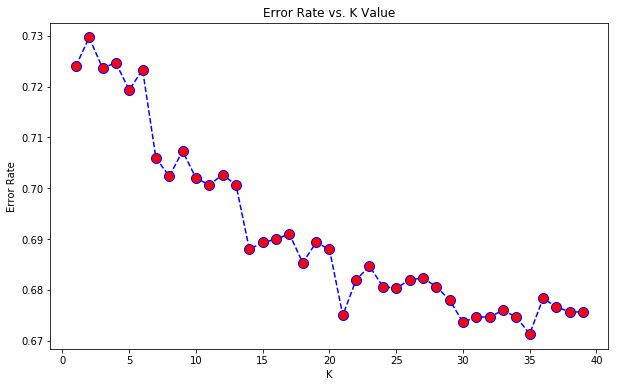

In [95]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [96]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=35)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=35')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=35


[[ 13 354   2 151]
 [ 24 704  10 339]
 [ 14 319   3 159]
 [ 29 609   4 266]]


              precision    recall  f1-score   support

           0       0.16      0.03      0.04       520
           1       0.35      0.65      0.46      1077
           2       0.16      0.01      0.01       495
           3       0.29      0.29      0.29       908

   micro avg       0.33      0.33      0.33      3000
   macro avg       0.24      0.24      0.20      3000
weighted avg       0.27      0.33      0.26      3000

